In [ ]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/gdrive')

In [ ]:
# Import necessary libraries
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
# Define data directories
train_dir = '/content/gdrive/MyDrive/Data/train'
val_dir = '/content/gdrive/MyDrive/Data/test'

In [ ]:
# Define image size and batch size
IMG_SIZE = 128
BATCH_SIZE = 32

# Define data augmentation
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    zoom_range=0.2,
    horizontal_flip=True,
    width_shift_range=0.2,
    height_shift_range=0.2
)

val_datagen = ImageDataGenerator(rescale=1./255)

# Load pre-trained model
base_model = tf.keras.applications.VGG16(input_shape=(IMG_SIZE, IMG_SIZE, 3), include_top=False, weights='imagenet')

# Freeze base model layers
for layer in base_model.layers:
    layer.trainable = False

# Add new layers
x = tf.keras.layers.Flatten()(base_model.output)
x = tf.keras.layers.Dense(512, activation='relu')(x)
x = tf.keras.layers.Dense(1, activation='sigmoid')(x)

# Create model
model = tf.keras.models.Model(base_model.input, x)

# Compile model
model.compile(optimizer=tf.keras.optimizers.Adam(lr=0.0001), loss='binary_crossentropy', metrics=['accuracy'])

# Create data generators
train_data = train_datagen.flow_from_directory(
    train_dir,
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    class_mode='binary'
)

val_data = val_datagen.flow_from_directory(
    val_dir,
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    class_mode='binary'
)

# Train model
history = model.fit(
    train_data,
    epochs=10,
    validation_data=val_data
)

58889256/58889256 [==============================] - 3s 0us/step


Found 19112 images belonging to 2 classes.
Found 930 images belonging to 2 classes.
Epoch 1/10
598/598 [==============================] - 15353s 26s/step - loss: 0.4877 - accuracy: 0.7690 - val_loss: 0.3676 - val_accuracy: 0.8140
Epoch 2/10
598/598 [==============================] - 143s 239ms/step - loss: 0.3650 - accuracy: 0.8351 - val_loss: 0.3235 - val_accuracy: 0.8559
Epoch 3/10
598/598 [==============================] - 144s 241ms/step - loss: 0.3516 - accuracy: 0.8419 - val_loss: 0.4355 - val_accuracy: 0.8065
Epoch 4/10
598/598 [==============================] - 143s 239ms/step - loss: 0.3251 - accuracy: 0.8530 - val_loss: 0.3577 - val_accuracy: 0.8387
Epoch 5/10
598/598 [==============================] - 143s 239ms/step - loss: 0.3220 - accuracy: 0.8550 - val_loss: 0.3145 - val_accuracy: 0.8398
Epoch 6/10
598/598 [==============================] - 143s 239ms/step - loss: 0.3093 - accuracy: 0.8626 - val_loss: 0.4368 - val_accuracy: 0.8075
Epoch 7/10
598/598 [====================

Found 930 images belonging to 2 classes.
930/930 [==============================] - 5s 5ms/step


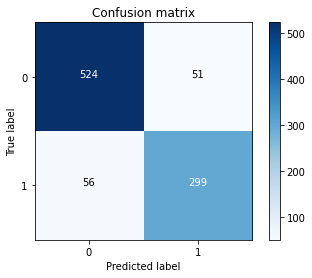

In [ ]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Make predictions on validation data
val_data = val_datagen.flow_from_directory(
    val_dir,
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=1,
    class_mode='binary',
    shuffle=False
)

y_true = val_data.labels
y_pred = model.predict(val_data)
y_pred = np.round(y_pred)

# Create confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Plot confusion matrix
plt.imshow(cm, cmap=plt.cm.Blues)
plt.title('Confusion matrix')
plt.colorbar()
plt.xticks([0,1])
plt.yticks([0,1])
plt.xlabel('Predicted label')
plt.ylabel('True label')

thresh = cm.max() / 2
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

plt.show()

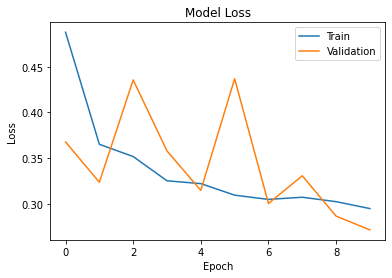

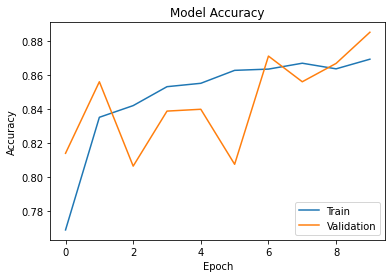

In [ ]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt

# Plot the Training Loss and Accuracy
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='lower right')
plt.show()